<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/Team_4_Augment_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 가져오기**

---



In [ ]:
!git clone https://github.com/caplove/DX_team_4_repo.git

Cloning into 'DX_team_4_repo'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 100 (delta 39), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (100/100), 3.58 MiB | 2.99 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [ ]:
#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)

In [ ]:
#Image('./image/image_02.jpg',width=800,height=700)

In [ ]:
#Image('./image/image_03.jpg',width=800,height=700)

In [ ]:
#Image('./image/image_05.jpg',width=800,height=700)

In [ ]:
"""입출력"""
import os

"""전처리"""
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from scipy.interpolate import CubicSpline      # for Data Augmentation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

"""시각화"""
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import seaborn as sns
#sns.set_style("white")
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 

## 데이터 프레임

In [ ]:
# 하위 폴더내에 각각 파일이 있고, 파일(폴더)명에 class 정보가 있을경우 
# 참조 : https://wikidocs.net/39

df=[]
df = pd.DataFrame()


for (path, dir, files) in os.walk("./DX_team_4_repo/Data/"):
                
        for filename in files:
             ext = os.path.splitext(filename)[-1]  # 확장자가 txt 이면...
             if ext == '.txt':
       
                # 해당파일을 DataFrame으로 읽고 class 추가하기
                print(path + '/' + filename)

                data = pd.read_csv(path + '/'+filename,sep='[:, ,]',names=['ID','accx','accy','accz','gyrx','gyry','gyrz','current','NaN'],header=None,index_col=None)
                data = data.drop(['ID','NaN'],axis=1)     # 다수의 sep는 [ A구분자,B구분자 ] 사용
    
                #Class 컬럼추가 (파일명에서  . 앞에 문자열 추출
                class_name = filename.split('.')[0]     
                data.loc[:,'CLASS']=np.array([class_name]*len(data))    

                #모든 Class 데이터 누적 합치기
                df = pd.concat([df,data])

./DX_team_4_repo/Data//idle.txt
./DX_team_4_repo/Data//coat_1.txt
./DX_team_4_repo/Data//suit_5.txt
./DX_team_4_repo/Data//shirt_4.txt
./DX_team_4_repo/Data//suit_3.txt
./DX_team_4_repo/Data//coat_2.txt
./DX_team_4_repo/Data//coat_3.txt
./DX_team_4_repo/Data//shirt_1.txt
./DX_team_4_repo/Data//coat_5.txt
./DX_team_4_repo/Data//suit_2.txt
./DX_team_4_repo/Data//shirt_5.txt
./DX_team_4_repo/Data//coat_4.txt
./DX_team_4_repo/Data//shirt_2.txt
./DX_team_4_repo/Data//shirt_3.txt
./DX_team_4_repo/Data//suit_1.txt
./DX_team_4_repo/Data//suit_4.txt


In [ ]:
df.head()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
0,0.0,0.0,1.0,0.18,1.04,-1.46,-0.02,idle
1,0.0,-0.0,1.0,0.24,0.98,-1.46,-0.02,idle
2,0.0,-0.0,1.0,0.06,1.04,-1.28,-0.06,idle
3,0.0,-0.0,1.0,-0.06,0.98,-1.40,-0.09,idle
4,0.0,-0.0,1.0,0.06,1.10,-1.34,0.01,idle


In [ ]:
df.tail()

,accx,accy,accz,gyrx,gyry,gyrz,current,CLASS
14689,-0.01,0.07,1.05,-1.28,1.28,-1.28,-0.57,suit_4
14690,-0.00,0.02,0.86,2.44,0.98,-1.46,-0.64,suit_4
14691,-0.00,-0.04,1.11,0.12,1.04,-1.22,-0.06,suit_4
14692,0.01,0.02,0.91,-0.55,1.16,-1.40,0.94,suit_4
14693,0.01,-0.05,1.06,-0.61,1.28,-1.40,-0.06,suit_4


In [ ]:
df.describe()

,accx,accy,accz,gyrx,gyry,gyrz,current
count,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000,274582.000000
mean,-0.000210,-0.000524,0.998872,0.263806,1.062795,-1.314019,0.084912
std,0.018129,0.035233,0.059794,1.455410,0.179769,0.192238,0.619515
min,-0.180000,-0.190000,0.570000,-15.630000,0.060000,-2.140000,-3.630000
25%,-0.010000,-0.020000,0.970000,-0.550000,0.980000,-1.400000,-0.480000
50%,0.000000,-0.000000,1.000000,0.240000,1.040000,-1.280000,0.070000
75%,0.010000,0.020000,1.030000,1.040000,1.160000,-1.220000,0.650000
max,0.140000,0.220000,1.440000,15.560000,2.320000,-0.430000,1.810000


## x,y 정의

In [ ]:
""" 설명 변수 및 반응변수 구분 """
x = df.drop(['CLASS'],axis=1)
y = df['CLASS']

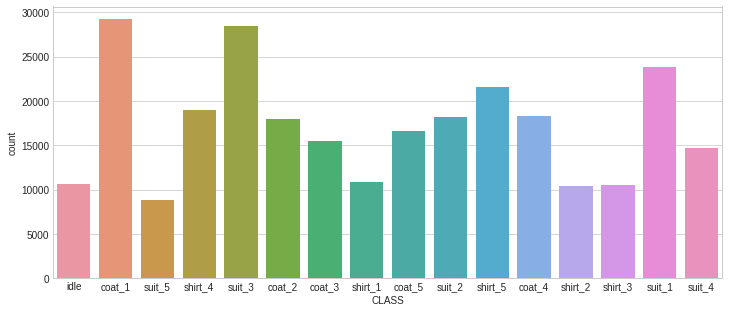

In [ ]:
"""분포 확인"""
plt.figure(figsize=(12, 5))
sns.countplot(y)           # 돗수분포
plt.show()

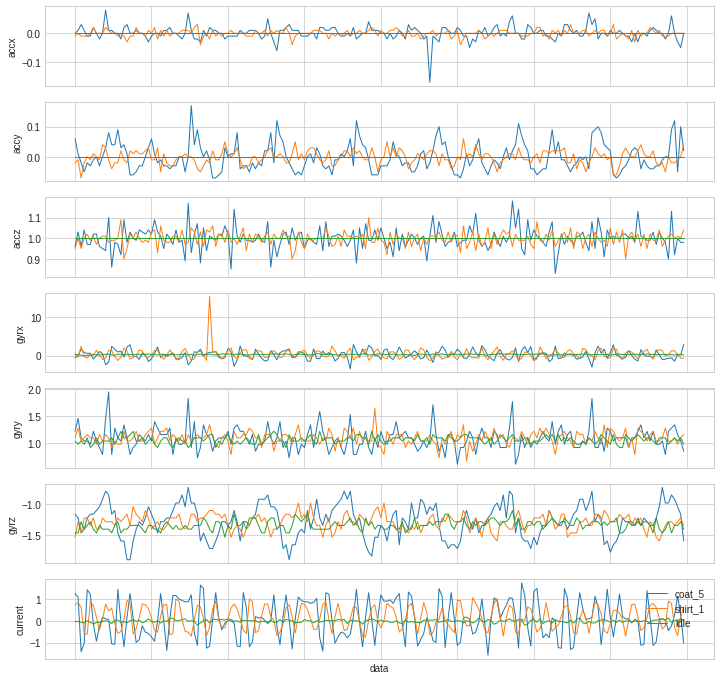

In [ ]:
"""데이터 확인"""
# 몇 개의 Class에 대하여, 맨 앞 1초간 데이터 관찰

class_list=['coat_5','shirt_1','idle']
sensor_list=['accx','accy','accz','gyrx','gyry','gyrz','current']
data_length=200       # 2초  @ 10ms sampling

plt.figure(figsize=(12,12))

for i in class_list:
    idx_class = df[df.CLASS == i]

    for j in sensor_list:
        idx_j = sensor_list.index(j)    # j의 위치를 찾아 subplot의 위치를 정함.
        plt.subplot(7,1,idx_j+1)
        plt.plot(idx_class[j][0:data_length],label=i,linewidth=1)
        plt.ylabel(j)
        plt.xticks(visible=False)
    
plt.xlabel('data')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Image('./image/image_06.jpg')

# **전처리**

---





>## Scaler 

In [ ]:
"""전처리 / 데이터 증강 """
#Image('./image/image_08.jpg',width=800, height=400)
# jittering, Scaling, Rotation,Permutation,Magnitude Warping,TimeWarp,Cropping ... 

'전처리 / 데이터 증강 '

>## Data Augmentation


>>>### *jittering*

In [ ]:
"""jittering"""
sigma = 0.005

def DA_Jitter(X, sigma=0.05):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise


#x_in=x.loc[:,'accx':'accz']    # array에서 slicing 은. 
#x_in=x.iloc[:,0:3]             # pd DataFrame에서 slicing은 .loc(인덱스기반) 또는 .iloc(위치기반) 써야함.
#print(x.shape,x_in.shape)

# x 전체 데이터에 jittering
x_in_jittering = DA_Jitter(x,sigma)

# x,y merge
#x_in=pd.concat([x,x_in_jittering],axis=0)
#y_in=pd.concat([y,y],axis=0)
#print(x.shape,x_in.shape,y.shape,y_in.shape)

# fig = plt.figure(figsize=(15,4))
# for ii in range(8):
#     ax = fig.add_subplot(2,4,ii+1)
#     ax.plot(DA_Jitter(x_in,sigma))
#     ax.set_xlim([0,100])
#     ax.set_ylim([-5,5])


>>>### *Magnitude Warping*

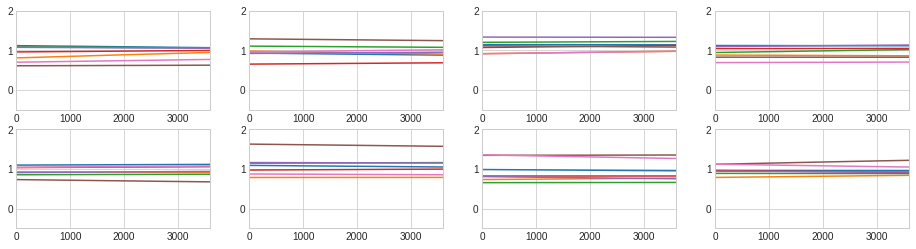

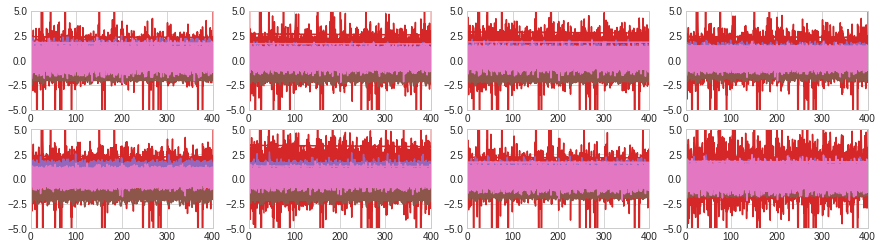

In [ ]:
"""Magnitude Warping"""
sigma = 0.2  # default 0.2  (standard deviation)
knot = 4      # default 4   (should be integer)

## This example using cubic splice is not the best approach to generate random curves. 
## You can use other aprroaches, e.g., Gaussian process regression, Bezier curve, etc.
def GenerateRandomCurves(X, sigma=0.2, knot=4):
    xx = (np.ones((X.shape[1],1))*(np.arange(0,X.shape[0], (X.shape[0]-1)/(knot+1)))).transpose()
    yy = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
    x_range = np.arange(X.shape[0])
    cs_x = CubicSpline(xx[:,0], yy[:,0])
    cs_y = CubicSpline(xx[:,1], yy[:,1])
    cs_z = CubicSpline(xx[:,2], yy[:,2])
    cs_a = CubicSpline(xx[:,3], yy[:,3])  # 추가
    cs_b = CubicSpline(xx[:,4], yy[:,4])  # 추가
    cs_c = CubicSpline(xx[:,5], yy[:,5])  # 추가
    cs_i = CubicSpline(xx[:,6], yy[:,6])  # 추가
    
    #return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range)]).transpose()
    return np.array([cs_x(x_range),cs_y(x_range),cs_z(x_range),cs_a(x_range),cs_b(x_range),cs_c(x_range),cs_i(x_range)]).transpose()



## Random curves around 1.0
fig = plt.figure(figsize=(16,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(GenerateRandomCurves(x.iloc[:,0:3], sigma))
    ax.plot(GenerateRandomCurves(x, sigma))

    plt.axis([0,3600,-0.5,2])

def DA_MagWarp(X, sigma):
    return X * GenerateRandomCurves(X, sigma)

fig = plt.figure(figsize=(15,4))
for ii in range(8):
    ax = fig.add_subplot(2,4,ii+1)
#    ax.plot(DA_MagWarp(x.iloc[:,0:3], sigma))
    ax.plot(DA_MagWarp(x,sigma))

    ax.set_xlim([0,400])
    ax.set_ylim([-5,5])    
    

In [ ]:
# x 전체 데이터에 Magnitude Warp
x_in_MagWarp = DA_MagWarp(x,sigma)


In [ ]:
#x,y merge
# x=pd.concat([x,x_in_jittering,x_in_MagWarp],axis=0)
# y=pd.concat([y,y,y],axis=0)
#print(x.shape,x_in.shape,y.shape,y_in.shape)
print(x.shape, x_in_jittering.shape, x_in_MagWarp.shape,y.shape)

(274582, 7) (274582, 7) (274582, 7) (274582,)


# **특징추출**
---

>>## MFCC

In [ ]:
"""전처리 / 특징 추출 """
"""MFCC"""
#Image('./image/image_09.jpg', width=400, height=100)   # https://blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=sooftware&logNo=221661644808

'MFCC'

In [ ]:
"""library"""
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

"""변수정의"""
fs=100
no_of_data=400
class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])

features_all=pd.DataFrame()
features_all_augment=pd.DataFrame()

"""함수정의"""
# list 들어오면, n개씩 쪼개서 return   https://jsikim1.tistory.com/141
def list_chunk(lst,n):
    return [lst[i:i+n] for i in range(0,len(lst),n)], len(lst)//n      #  // 몫


In [ ]:
"""Augmentation 포함 특징추출"""
x_list=[x, x_in_jittering, x_in_MagWarp]

#class_list=np.array(['coat_5','shirt_1'])
class_list=np.array(['idle', 'suit_1','suit_2','suit_3','suit_4','suit_5','shirt_1','shirt_2','shirt_3',
            'shirt_4','shirt_5','coat_1','coat_2','coat_3','coat_4','coat_5'])
features_all=pd.DataFrame()

for ii in x_list:
# 각 class별로 n개씩 묶어서(chunk) -->  mfcc -->  merge 함.

# chunk
    for i in class_list:       # class별로 'idle', 'suit1', ....
        idx_class = y == i
        x_in, count = list_chunk(ii['accx'][idx_class],no_of_data)   # x 400ea
        y_in, count = list_chunk(ii['accy'][idx_class],no_of_data)   # y 400ea
        z_in, count = list_chunk(ii['accz'][idx_class],no_of_data)   # z 400ea
        current_in, count = list_chunk(ii['current'][idx_class],no_of_data)   # current 400ea 
        class_in,count = list_chunk(y[idx_class],no_of_data)   # label
        print("class:", i, "    chunk개수:",count)  # class별 chunked 개수 확인
    
# mfcc & merge
        for j in range(0,count-1):    # 클래스 내의 j번째 chunk
            # mfcc
            x_in_chunk = np.array(x_in[j])
            y_in_chunk = np.array(y_in[j])
            z_in_chunk = np.array(z_in[j])
            current_in_chunk = np.array(current_in[j])
            #print(x_in_chunk.shape)            # (400,)
            mfccs_x_chunk = librosa.feature.mfcc(x_in_chunk, sr=fs, n_mfcc=13)
            mfccs_y_chunk = librosa.feature.mfcc(y_in_chunk, sr=fs, n_mfcc=13)
            mfccs_z_chunk = librosa.feature.mfcc(z_in_chunk, sr=fs, n_mfcc=13)
            mfccs_current_chunk = librosa.feature.mfcc(current_in_chunk, sr=fs, n_mfcc=13)
            #print(x_in_chunk.shape, mfccs_x_chunk.shape)         # (13,1)
 
            # class
            class_in_chunk = class_in[0]
 
            # features merge
            features_chunk = np.concatenate((mfccs_x_chunk,mfccs_y_chunk,mfccs_y_chunk,mfccs_current_chunk),axis=0)
        
            #features + class
            features_chunk = pd.DataFrame(features_chunk).T
            features_chunk['class']=class_in_chunk
            #features_chunk['class']=class_location
        
            #print(features_chunk.head())
            features_all = pd.concat([features_all,features_chunk],axis=0)

class: idle     chunk개수: 26
class: suit_1     chunk개수: 59
class: suit_2     chunk개수: 45
class: suit_3     chunk개수: 71
class: suit_4     chunk개수: 36
class: suit_5     chunk개수: 22
class: shirt_1     chunk개수: 27
class: shirt_2     chunk개수: 25
class: shirt_3     chunk개수: 26
class: shirt_4     chunk개수: 47
class: shirt_5     chunk개수: 53
class: coat_1     chunk개수: 73
class: coat_2     chunk개수: 44
class: coat_3     chunk개수: 38
class: coat_4     chunk개수: 45
class: coat_5     chunk개수: 41
class: idle     chunk개수: 26
class: suit_1     chunk개수: 59
class: suit_2     chunk개수: 45
class: suit_3     chunk개수: 71
class: suit_4     chunk개수: 36
class: suit_5     chunk개수: 22
class: shirt_1     chunk개수: 27
class: shirt_2     chunk개수: 25
class: shirt_3     chunk개수: 26
class: shirt_4     chunk개수: 47
class: shirt_5     chunk개수: 53
class: coat_1     chunk개수: 73
class: coat_2     chunk개수: 44
class: coat_3     chunk개수: 38
class: coat_4     chunk개수: 45
class: coat_5     chunk개수: 41
class: idle     chunk개수: 26
class:

In [ ]:
"""전처리 후 데이터 구조"""
features_all.shape

(1986, 53)

In [ ]:
features_all.head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255,idle
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350,idle


In [ ]:
features_all.tail()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,class
0,94.444643,11.503776,8.106698,-0.829944,1.512319,-7.742494,-3.184366,-0.903565,1.126107,2.210496,-4.223617,2.578631,1.008893,70.960142,4.704148,12.638015,6.855772,-2.769328,-3.285908,-4.787061,-4.487820,-2.401374,-4.237248,-1.201685,-8.465751,-3.267391,70.960142,4.704148,12.638015,6.855772,-2.769328,-3.285908,-4.787061,-4.487820,-2.401374,-4.237248,-1.201685,-8.465751,-3.267391,391.684421,24.172984,-5.525565,8.149580,15.708373,6.195842,-7.753329,-8.997893,-3.659247,12.242371,8.465809,-10.733803,-19.053575,coat_5
0,100.044615,7.055945,17.034452,-2.419943,-4.752552,-6.199724,-3.095157,-0.833178,0.953570,3.486050,-4.672322,4.269372,2.337691,63.521231,5.996108,10.376737,5.485574,-2.038435,-5.215454,-8.255447,-10.955730,-9.488277,-4.694949,-2.452429,-3.944978,-7.792162,63.521231,5.996108,10.376737,5.485574,-2.038435,-5.215454,-8.255447,-10.955730,-9.488277,-4.694949,-2.452429,-3.944978,-7.792162,394.101282,23.911065,-15.794894,4.321658,18.048760,3.359089,0.495194,-4.939405,-0.634701,5.774868,4.066276,-12.346265,-18.718180,coat_5
0,90.565449,8.432128,1.578849,-1.344278,-3.873592,-7.344690,-4.957833,-0.790532,-1.753178,-5.615139,3.061563,3.009796,-3.162407,57.779787,2.895234,16.410094,-3.777328,-5.827186,-3.381439,-5.371685,-7.047434,-8.367736,-0.445467,0.102967,-8.677807,-1.544204,57.779787,2.895234,16.410094,-3.777328,-5.827186,-3.381439,-5.371685,-7.047434,-8.367736,-0.445467,0.102967,-8.677807,-1.544204,394.960131,26.051020,-10.306542,2.975730,17.766519,-0.670013,-6.609367,-6.392524,-9.428351,11.328038,3.578439,-17.606740,-15.115946,coat_5
0,101.301366,5.441652,2.049606,-3.027297,-3.679643,-2.170426,-4.917263,-2.201991,-1.879259,4.785334,3.458026,3.355721,3.119487,72.612404,6.602639,4.672735,6.501437,-2.851403,-5.168791,-5.152615,-13.328205,-9.114650,-8.682165,4.159813,-4.782008,-2.775797,72.612404,6.602639,4.672735,6.501437,-2.851403,-5.168791,-5.152615,-13.328205,-9.114650,-8.682165,4.159813,-4.782008,-2.775797,387.191954,23.061687,-10.047472,3.891428,14.178191,-3.506601,-10.550226,-1.225994,0.594666,6.839412,0.156165,-3.886605,-11.525357,coat_5
0,112.016460,-4.949271,4.313698,2.458161,-2.980690,-6.654101,-6.114407,-2.974313,-3.486166,1.977544,-0.395990,1.980222,1.570702,56.019417,4.055064,12.308703,8.892378,1.826654,3.012115,0.714916,-8.464091,-4.591120,2.936454,-1.494213,-1.765650,-19.276654,56.019417,4.055064,12.308703,8.892378,1.826654,3.012115,0.714916,-8.464091,-4.591120,2.936454,-1.494213,-1.765650,-19.276654,396.141941,14.070371,-16.890422,4.744704,14.008778,2.162419,-9.978080,-1.536384,-4.332637,2.432738,3.984750,-11.299057,-14.944012,coat_5


In [ ]:
features_all.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,23.256094,1.256743,2.359572,-0.161219,-3.189257,-4.195133,-3.530315,-3.479841,-2.130264,-0.199464,1.709829,1.285703,0.206442,58.068516,1.678706,5.509693,0.905420,-3.220333,1.914374,-6.252894,-8.440053,-5.359087,-0.378245,1.265098,-2.666657,-3.426000,58.068516,1.678706,5.509693,0.905420,-3.220333,1.914374,-6.252894,-8.440053,-5.359087,-0.378245,1.265098,-2.666657,-3.426000,355.177067,32.474973,-14.289950,-12.728901,-3.645818,2.404959,-0.399980,-0.511403,2.711019,1.541928,-4.475930,-5.783458,-4.092313
std,188.848719,7.385452,4.875102,4.211751,3.965815,4.311424,3.489004,3.674635,3.487727,3.725262,3.831873,3.440787,3.847328,194.466401,5.863947,4.334497,4.176323,4.080852,5.810910,3.772750,3.533295,3.394000,3.583980,3.789531,3.989184,3.893390,194.466401,5.863947,4.334497,4.176323,4.080852,5.810910,3.772750,3.533295,3.394000,3.583980,3.789531,3.989184,3.893390,33.382961,9.007906,8.369107,10.111981,9.269551,5.261919,6.124253,4.226616,4.658803,7.024661,6.560316,7.410972,9.181912
min,-1131.370850,-18.058310,-12.812237,-17.401810,-16.153447,-21.187619,-15.800104,-16.008707,-12.292355,-12.066660,-8.692731,-11.825946,-12.282162,-1131.370850,-21.117889,-7.356230,-13.788668,-17.727771,-14.846608,-20.388093,-19.150524,-16.677591,-15.241951,-10.467851,-13.083101,-19.284280,-1131.370850,-21.117889,-7.356230,-13.788668,-17.727771,-14.846608,-20.388093,-19.150524,-16.677591,-15.241951,-10.467851,-13.083101,-19.284280,194.885693,-7.474028,-43.379060,-33.433300,-28.752216,-17.847152,-18.615645,-11.829020,-11.792352,-18.784968,-20.259759,-24.791309,-24.629218
25%,27.735445,-4.017542,-0.881233,-2.870020,-5.830101,-6.865641,-5.846567,-5.952812,-4.565478,-2.532219,-0.692111,-1.091257,-2.305318,61.268039,-1.877229,2.456137,-1.811603,-5.788601,-2.612800,-8.664516,-10.796551,-7.810293,-2.754668,-1.140943,-5.495163,-6.147455,61.268039,-1.877229,2.456137,-1.811603,-5.788601,-2.612800,-8.664516,-10.796551,-7.810293,-2.754668,-1.140943,-5.495163,-6.147455,341.304374,28.332082,-18.883920,-20.492398,-9.837796,-0.646517,-4.687058,-3.489935,-0.605172,-3.638731,-9.642667,-11.069152,-11.861861
50%,46.820906,0.309030,2.261058,0.000000,-3.250189,-4.102792,-3.497371,-3.449556,-2.046529,-0.075721,1.588220,1.098370,0.241048,93.470441,1.484147,5.208432,1.016111,-3.240374,1.894653,-6.352919,-8.492860,-5.353206,-0.300271,1.108507,-2.653383,-3.735098,93.470441,1.484147,5.208432,1.016111,-3.240374,1.894653,-6.352919,-8.492860,-5.353206,-0.300271,1.108507,-2.653383,-3.735098,358.291405,33.640547,-13.608232,-14.524451,-5.378168,2.487621,0.099388,-0.769758,2.602893,1.759692,-5.113676,-6.462524,-3.612304
75%,82.051004,5.891221,5.842772,2.674095,-0.541695,-1.222756,-0.985685,-0.827030,0.061815,2.251433,4.084561,3.627456,2.731341,111.663286,5.314694,8.342770,3.825217,-0.391244,6.259119,-4.041910,-6.523396,-2.910993,2.206921,3.890309,0.000000,-0.582767,111.663286,5.314694,8.342770,3.825217,-0.391244,6.259119,-4.041910,-6.523396,-2.910993,2.206921,3.890309,0.000000,-0.582767,375.655112,38.185513,-8.963272,-5.982065,1.158170,5.570769,3.737256,2.183574,5.790892,6.267074,0.472104,-0.626629,3.611477
max,133.720124,25.968022,17.038185,11.986751,9.430757,13.020991,8.079615,10.244964,10.442778,11.087663,15.160434,12.840608

# **모형 설계/훈련/평가**
---

>>## DNN

>>>### x,y 정의 (features 기반)

In [ ]:
"""x,y 정의"""
x=features_all.drop('class',axis=1)
y=features_all['class']

"""class를 숫자로 변환 for pytorch"""
y_number=[]
for i in y:
    y_tmp=(np.where(i == class_list))[0][0]    # [0][0] 추가해서 데이터만 추출
    #print (i,y_tmp)
    y_number.append(y_tmp)
    #print(i,y_tmp[0][0])

y=np.array(y_number).reshape(-1,)
y=pd.Series(y)

In [ ]:
# 데이터 shape check  (AAA,00) (000,)
print(x.shape,y.shape)

(1986, 52) (1986,)


In [ ]:
display(x.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201.391341,0.925284,-4.041210,7.387525,1.751451,0.090655,0.394997,1.490920,2.452048,-4.733238,3.687767,0.847616,3.709894
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,273.739337,2.944957,0.142026,-0.573331,1.535497,-3.454344,-7.073645,-2.805138,-1.876212,-2.081281,-6.421273,1.218584,0.310433
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.218297,1.315889,5.813116,-5.363791,-6.252804,-2.776524,-2.444918,0.976442,3.285535,-0.567978,-2.320336,-0.079556,5.451989
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.913445,1.792793,-1.025874,-3.227174,-7.178538,3.415736,-5.713125,-3.127864,1.936888,4.775039,-2.434643,3.841988,2.972255
0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1131.37085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.336192,-5.578025,-3.158794,-1.916322,-3.194026,-7.659798,-5.715364,0.557323,6.521582,6.264885,-7.649926,3.726388,4.487350


0    0
1    0
2    0
3    0
4    0
dtype: int64

In [ ]:
"""데이터셑 나누기"""
# train, test
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.2)
# train, validation
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, stratify=train_y, test_size=0.2)
print(f"학습 데이터셋 크기 : {train_x.shape}, 검증 데이터셋 크기 : {valid_x.shape}, 테스트 데이터셋 크기 : {test_x.shape}")

학습 데이터셋 크기 : (1270, 52), 검증 데이터셋 크기 : (318, 52), 테스트 데이터셋 크기 : (398, 52)


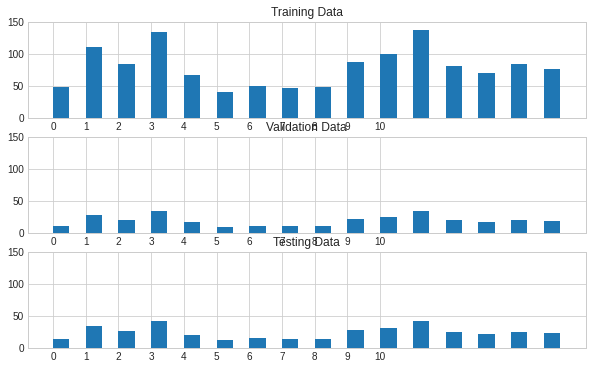

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.hist(train_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Training Data')

plt.subplot(312)
plt.hist(valid_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Validation Data')

plt.subplot(313)
plt.hist(test_y, bins=np.arange(0, 16, 0.5))
plt.ylim(0, 150)
plt.xticks(np.arange(0 , 11, 1))
plt.title('Testing Data')
plt.show()

>>>### 분류기 모형

In [ ]:
"""분류기 모형 설정"""

"""DNN"""
'''Neural Network을 위한 딥러닝 모듈'''
import torch             # 딥러닝 모듈이고, 로컬에서는  설치필요
import copy
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

''' 결과 평가용 모듈 '''
from sklearn.metrics import accuracy_score, confusion_matrix
    
''' 기타 optional'''
import warnings, itertools
warnings.filterwarnings(action='ignore')


#https://colab.research.google.com/drive/1kt8Zmy-qiE4mhcgBrFUAzdBmVh9UVyGK#scrollTo=1ed897f1
train_x_torch = torch.FloatTensor(train_x.values) # torch.FloatTensor(numpy)
train_y_torch = torch.LongTensor(train_y.values) # torch.LongTensor(numpy)
trainDataset = torch.utils.data.TensorDataset(train_x_torch, train_y_torch)
trainLoader = torch.utils.data.DataLoader(dataset = trainDataset,
                                         batch_size = 100,
                                         shuffle = True)

# 검증에는 shuffle 하지 않음.  w 찾는게 아님.
valid_x_torch = torch.FloatTensor(valid_x.values) # torch.FloatTensor(numpy)
valid_y_torch = torch.LongTensor(valid_y.values) # torch.LongTensor(numpy)
validDataset = torch.utils.data.TensorDataset(valid_x_torch, valid_y_torch)
validLoader = torch.utils.data.DataLoader(dataset = validDataset,
                                        batch_size = 100,
                                        shuffle = False)

test_x_torch = torch.FloatTensor(test_x.values) # torch.FloatTensor(numpy)
test_y_torch = torch.LongTensor(test_y.values) # torch.LongTensor(numpy)
testDataset = torch.utils.data.TensorDataset(test_x_torch, test_y_torch)
testLoader = torch.utils.data.DataLoader(dataset = testDataset,
                                        batch_size = 100,
                                        shuffle = False)

In [ ]:
# 모형
class DNNClassifier(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):    # 모델 구조 정의
        # input_dim = 784, output_dim = 10 (클래스 개수)
        super().__init__()
        
        ''' 모델 구조 만들기'''
        # CNN, RNN, LSTM등은 linear가 아니다.
        self.linear1 = torch.nn.Linear(input_dim, hidden_dim1) # input_dim(784) -> hidden_dim1(500)
        self.linear2 = torch.nn.Linear(hidden_dim1, hidden_dim2) # hidden_dim1(500) -> hidden_dim2(300)
        self.linear3 = torch.nn.Linear(hidden_dim2, hidden_dim3) # hidden_dim2(300) -> hidden_dim3(100)
        self.linear4 = torch.nn.Linear(hidden_dim3, output_dim) # hidden_dim3(100) -> output_dim(10)
        
        self.relu = torch.nn.ReLU() # Relu activation function
        self.dropout = torch.nn.Dropout(p=0.5)     # p = 0.5는 확률개념으로 50% 는 w 를 업데이트 하지 않음. overfit 방지
        
    def forward(self, x):                                                                # 순서, Sequence 정의
        
        ''' 짜여진 모델에 설명 변수 데이터 x를 입력할 때 진행할 순서 설정'''

        x = self.linear1(x) 
        x = self.relu(x) 
        x = self.linear2(x)
        x = self.relu(x)
        x = self.dropout(x)     # 반절만 활성화
        x = self.linear3(x)
        x = self.relu(x)
        output = self.linear4(x) 
        
        return output

In [ ]:
#모델 및 비용함수, Solver 설정
print(train_x.shape[1],train_y.nunique())

52 16


In [ ]:
# 빈 모델 생성
clf_DNN = DNNClassifier(train_x.shape[1], 500, 300, 100, train_y.nunique())  # features개수, Hidden Layer1, Hidden Layer2, Hidden Layer3, class 개수

In [ ]:
# 비용함수 정의
criterion = torch.nn.CrossEntropyLoss()

# Solver 설정
# 경사하강법의 종류 정의 (adam)
solver = torch.optim.Adam(clf_DNN.parameters(), lr = 0.001)

>>>### 훈련 / 검증

In [ ]:
num_epochs = 100

print("Start Training !")
print('-'*50)

# 빈 공간 할당
train_loss_total = []
valid_loss_total = []
best_loss = np.inf


# 
for epoch in range(num_epochs):
    #초기값  
    train_loss = 0
    valid_loss = 0
    
    ''' Training '''
    clf_DNN.train()
    for x_data, y_data in trainLoader:          # trainLoader로 구성해놨던 데이터 가져옴.
        
        # 정확한 학습을 위하여 모든 기울기 값을 0으로 설정
        solver.zero_grad()
        
        y_pred = clf_DNN(x_data)
        
        # 비용함수를 활용하여 오차 계산
        loss = criterion(y_pred, y_data)
        
        # 계산된 오차를 기반으로, 오차를 줄일 수 있는 방향으로 w값 업데이트  (즉, backpropagation !)
        loss.backward()
        solver.step() # forward evaluation, backward propagation, update를 모두 포함하는 step

        train_loss += loss.item()
    
    ''' Validation '''
    clf_DNN.eval()
    for eval_x_data, eval_y_data in validLoader:
        eval_y_pred = clf_DNN(eval_x_data)
        valid_loss += criterion(eval_y_pred, eval_y_data).item() # 딕셔너리에 있는 키와 값들의 쌍을 얻어 저장



    """ 결과출력"""    
    print('[%d epoch] Train loss : %.3f, Valid loss : %.3f' % (epoch+1, train_loss/len(trainLoader), valid_loss/len(validLoader)))
    
    if valid_loss/len(validLoader) < best_loss:
        # 로스값 업데이트
        best_loss = valid_loss/len(validLoader)        # validation loss 값이 점점줄다가 다시커지게 되므로 가장적었을때의 epoch와 파라미터 w를 기억해둔다.
        # 최적의 epoch 수와 모델 저장하기
        best_epoch = epoch
        best_model = clf_DNN.state_dict()
    
    train_loss_total.append(train_loss/len(trainLoader))
    valid_loss_total.append(valid_loss/len(validLoader))
    
print('-'*50)
print("Finished Training ! Best Epoch is epoch %d." % (best_epoch+1))

Start Training !
--------------------------------------------------
[1 epoch] Train loss : 3.166, Valid loss : 2.273
[2 epoch] Train loss : 2.220, Valid loss : 1.841
[3 epoch] Train loss : 1.844, Valid loss : 1.481
[4 epoch] Train loss : 1.591, Valid loss : 1.290
[5 epoch] Train loss : 1.437, Valid loss : 1.064
[6 epoch] Train loss : 1.247, Valid loss : 0.895
[7 epoch] Train loss : 1.100, Valid loss : 0.798
[8 epoch] Train loss : 1.003, Valid loss : 0.732
[9 epoch] Train loss : 0.930, Valid loss : 0.632
[10 epoch] Train loss : 0.822, Valid loss : 0.516
[11 epoch] Train loss : 0.744, Valid loss : 0.489
[12 epoch] Train loss : 0.697, Valid loss : 0.425
[13 epoch] Train loss : 0.637, Valid loss : 0.371
[14 epoch] Train loss : 0.624, Valid loss : 0.365
[15 epoch] Train loss : 0.543, Valid loss : 0.317
[16 epoch] Train loss : 0.529, Valid loss : 0.313
[17 epoch] Train loss : 0.484, Valid loss : 0.237
[18 epoch] Train loss : 0.461, Valid loss : 0.218
[19 epoch] Train loss : 0.435, Valid loss

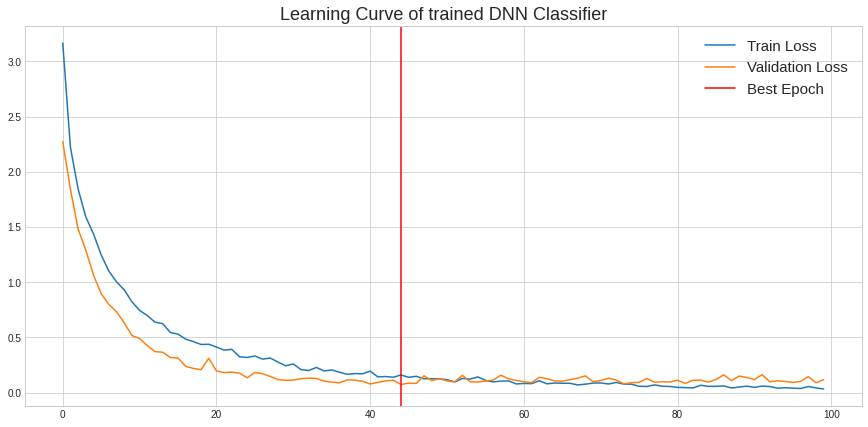

In [ ]:
# learning Curve
plt.figure(figsize=(15,7))

# 학습 및 검증 로스 변동 관찰하기
plt.plot(train_loss_total,label='Train Loss')
plt.plot(valid_loss_total, label='Validation Loss')
# 최적의 모델이 저장된 곳 표시
plt.axvline(x = best_epoch, color='red', label='Best Epoch')    # axv 는 수직선 그리기
plt.legend(fontsize=15)
plt.title("Learning Curve of trained DNN Classifier", fontsize=18)
plt.show()

# 빨간선왼쪽, underfit, 오르쪽은 overfit
# 주관적으로 약간 왼쪽 또는 오른쪽으로 볼수 있음.

In [ ]:
"""1차 평가 /w test_set"""
# DNN 성능평가
# 최적의 모델 불러오기
best_clf_DNN = DNNClassifier(train_x.shape[1], 500, 300, 100, 16)
best_clf_DNN.load_state_dict(best_model)

<All keys matched successfully>

In [ ]:
# model을 evaluation 모드로 변경
best_clf_DNN.eval()

DNNClassifier(
  (linear1): Linear(in_features=52, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=300, bias=True)
  (linear3): Linear(in_features=300, out_features=100, bias=True)
  (linear4): Linear(in_features=100, out_features=16, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
# clf_mlp(data) == data -> logit -> probability=softmax(logit)
y_train_prob = best_clf_DNN(train_x_torch).softmax(dim=1)

# 가장 큰 확률값에 해당하는 범주를 예측 범주로 저장
y_train_pred = y_train_prob.max(1)[1].numpy()

In [ ]:
y_train_prob[0].detach().numpy().tolist()

[3.348093677302266e-11,
 5.108135442410955e-11,
 1.4086096733478826e-08,
 7.472802903555985e-19,
 4.091358725034668e-17,
 2.4129393550630563e-19,
 9.117407984149395e-08,
 7.200917195859802e-08,
 1.9610608438785232e-13,
 2.3217874533399817e-17,
 7.566828565640227e-13,
 0.9999997615814209,
 1.9314033011808007e-11,
 2.343384146517006e-16,
 5.05170124481813e-13,
 1.1058262618844167e-16]

In [ ]:
y_train_pred[0]

11

In [ ]:
train_y.head(1)

1757    11
dtype: int64

In [ ]:
train_accuracy = accuracy_score(y_pred=y_train_pred,y_true=train_y)

print(f"훈련 데이터셋 정확도: {train_accuracy:.3f}")

훈련 데이터셋 정확도: 1.000


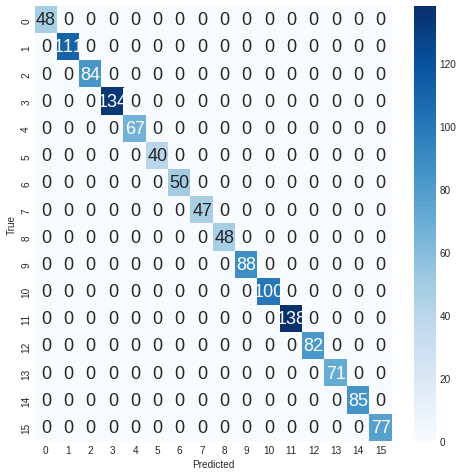

In [ ]:
cm_train = confusion_matrix(y_true=train_y, y_pred=y_train_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
"""학습된 DNN Classifier 결과 확인 및 성능 평가 : Validation Data"""
y_valid_prob = best_clf_DNN(valid_x_torch).softmax(dim=1)
y_valid_pred = y_valid_prob.max(1)[1].numpy()
valid_accuracy = accuracy_score(y_pred=y_valid_pred,y_true=valid_y)

print(f"검증용 데이터셋 정확도: {valid_accuracy:.3f}")


검증용 데이터셋 정확도: 0.975


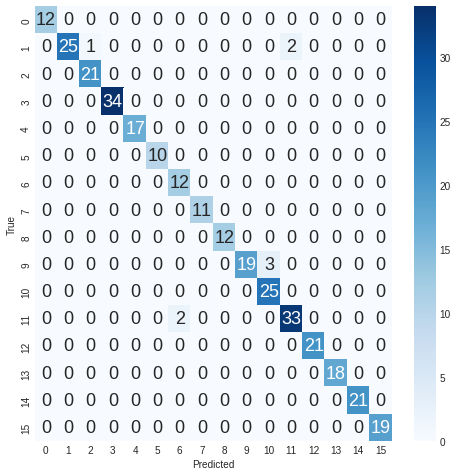

In [ ]:
cm_valid = confusion_matrix(y_true=valid_y, y_pred=y_valid_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_valid, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
"""성능평가 : Testing Data"""
y_test_prob = best_clf_DNN(test_x_torch).softmax(dim=1)
y_test_pred = y_test_prob.max(1)[1].numpy()
test_accuracy = accuracy_score(y_pred=y_test_pred,y_true=test_y)

print(f"테스트용 데이터셋 정확도: {test_accuracy:.3f}")

테스트용 데이터셋 정확도: 0.977


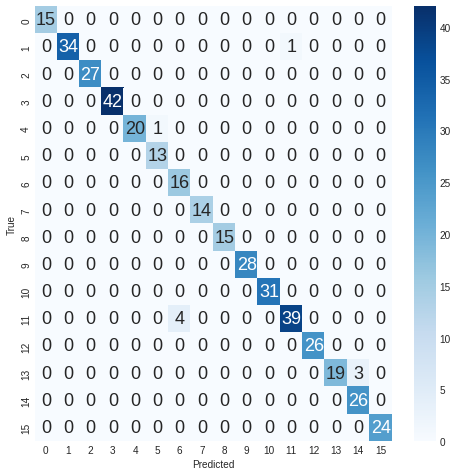

In [ ]:
cm_test = confusion_matrix(y_true=test_y, y_pred=y_test_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 18}, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

>>## MLP

In [ ]:
"""분류기 모형 설정"""


In [ ]:
"""1차 평가 /w test_set"""


>>## Decision Tree

In [ ]:
"""분류기 모형 설정"""

In [ ]:
"""1차 평가 /w test_set"""

>>## KNN

In [ ]:
"""분류기 모형 설정"""

In [ ]:
"""1차 평가 /w test_set"""

# **결과**
---
>Data Augmentation 유/무, a모형별, 별도 검증 데이터 기반 Accuracy 비교

In [ ]:
"""Data Augmentation 유/무, a모형별, 별도 검증 데이터 기반 Accuracy 비교"""